C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe


In [6]:
# C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe pip install vnstock

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vnstock import * # Import tất cả các hàm từ thư viện 
import sys
import warnings
warnings.filterwarnings("ignore")
print(sys.executable)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', True)


C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe


In [13]:
from vnstock.explorer.vci import Listing, Quote, Company, Finance, Trading
# VCI là nguồn dữ liệu từ CK Vietcap bên cạnh nguồn từ TCBS
from vnstock import Listing
listing = Listing()

## 1. Chuẩn bị DL Cổ phiếu 

In [17]:
df_list_symbols_by_exchange = listing.symbols_by_exchange()

In [18]:
df_list_symbols_by_exchange.columns

Index(['symbol', 'exchange', 'type', 'organ_short_name', 'organ_name',
       'product_grp_id'],
      dtype='object')

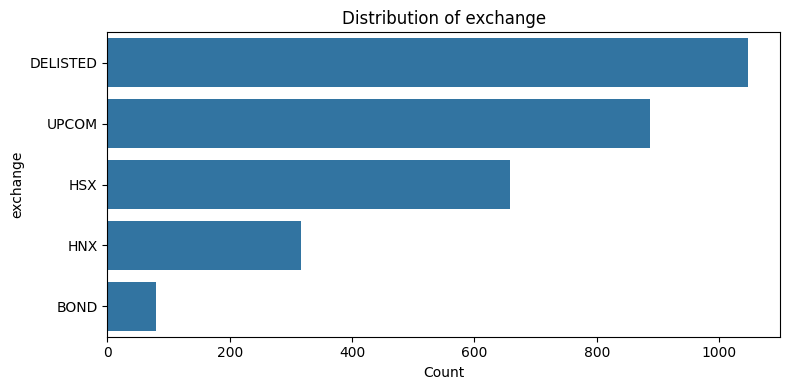

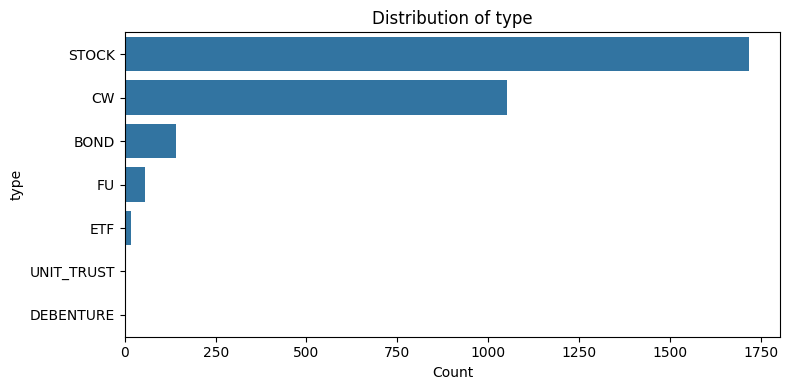

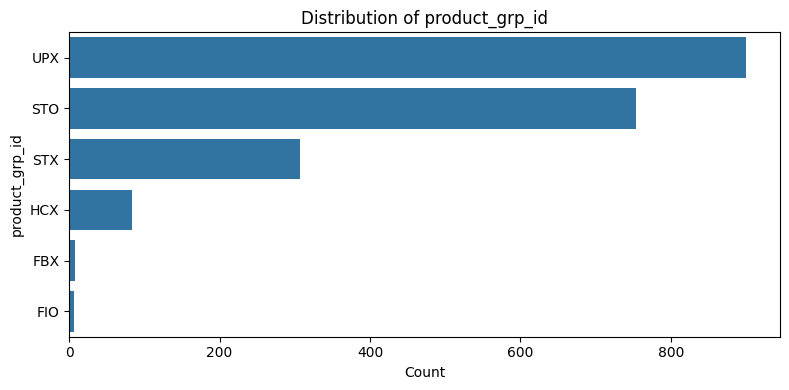

In [39]:
categorical_columns = ['exchange', 'type', 'product_grp_id']

# Generate a bar plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=column, data=df_list_symbols_by_exchange, order = df_list_symbols_by_exchange[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


In [117]:
df_stock_short.shape

(697, 4)

In [44]:
df_stock_short = df_list_symbols_by_exchange[
    df_list_symbols_by_exchange['exchange'].isin(['HSX', 'HNX'])
    & (df_list_symbols_by_exchange['type'] == 'STOCK')
]

In [45]:
df_stock_short = df_stock_short[['symbol', 'exchange', 'organ_name']]

In [46]:
df_stock_short.head(3)

,symbol,exchange,organ_name
1,YEG,HSX,Công ty Cổ phần Tập đoàn Yeah1
2,YBM,HSX,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái
14,X20,HNX,Công ty Cổ phần X20


In [ ]:
df_symbols_by_industries = listing.symbols_by_industries()
df_stock_industry = df_symbols_by_industries[['symbol', 'icb_name2']].rename(columns = {'icb_name2': 'industry'})
df_stock_short = pd.merge(df_stock_short, df_stock_industry, how = 'left', on = 'symbol')

In [51]:
df_stock_short.head(5)

,symbol,exchange,organ_name,industry
0,YEG,HSX,Công ty Cổ phần Tập đoàn Yeah1,Truyền thông
1,YBM,HSX,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái,Tài nguyên Cơ bản
2,X20,HNX,Công ty Cổ phần X20,Hàng cá nhân & Gia dụng
3,WSS,HNX,Công ty Cổ phần Chứng khoán Phố Wall,Dịch vụ tài chính
4,WCS,HNX,Công ty Cổ phần Bến xe Miền Tây,Hàng & Dịch vụ Công nghiệp


## 2. Báo cáo tài chính

In [59]:
from vnstock import Company
company = Company(symbol='SSI', source='VCI')

### 2.1 Thông tin chung

In [62]:
# Hồ sơ
company.overview()

,symbol,id,issue_share,history,company_profile,icb_name3,icb_name2,icb_name4,financial_ratio_issue_share,charter_capital
0,SSI,74416,1973863918,"- Năm 1999: Công ty Cổ phần Chứng khoán Sài Gòn được thành lập, trụ sở chính tại Thành phố Hồ Chí Minh với 2 nghiệp vụ chính Dịch vụ chứng khoán và Tư vấn đầu tư. Vốn điều lệ ban đầu của công ty là 6 tỷ đồng. - Năm 2001: Tăng vốn điều lệ tăng lên 9 tỷ đồng. - Tháng 07/2001: Tăng vốn điều lệ tăng lên 20 tỷ đồng và cung cấp 4 nghiệp vụ chính là tư vấn đầu tư, dịch vụ chứng khoán, tự doanh và lưu ký chứng khoán. - Tháng 07/2002: Thành lập chi nhánh Hà Nội, mở rộng kinh doanh ra các tỉnh phía Bắc. - Tháng 04/2004: Tăng vốn điều lệ tăng lên 23 tỷ đồng. - Tháng 02/2005: Tăng vốn điều lệ tăng lên 26 tỷ đồng. - Tháng 06/2005: Tăng vốn điều lệ tăng lên 52 tỷ đồng và bổ sung thêm nghiệp vụ Bảo lãnh phát hành chứng khoán. - Tháng 02/2006: Tăng vốn điều lệ tăng lên 120 tỷ đồng. - Tháng 05/2006: Tăng vốn điều lệ tăng lên 300 tỷ đồng và trở thành công ty chứng khoán có vốn điều lệ lớn nhất thị trường chứng khoán Việt Nam ở thời điểm bấy giờ. - Tháng 09/2006: Tăng vốn điều lệ tăng lên 500 tỷ đồng. - Ngày 15/12/2006: Cổ phiếu của công ty được niêm yết trên sàn HaSTC. - Tháng 07/2007: Tăng vốn điều lệ tăng lên hơn 799 tỷ đồng. - Ngày 29/10/2007: Cổ phiếu của công ty được chuyển sang niêm yết tại HOSE. - Tháng 03/2008: Tăng vốn điều lệ lên 1.199 tỷ đồng. - Tháng 04/2008: Tăng vốn điều lệ lên 1.366 tỷ đồng. - Tháng 01/2009: Tăng vốn điều lệ lên 1.533 tỷ đồng. - Tháng 3/2010: Tăng vốn điều lệ lên 1.755 tỷ đồng. - Tháng 05/2010: Tăng vốn điều lệ lên 3.511 tỷ đồng. - Tháng 01/2012: Tăng vốn điều lệ lên 3.526 tỷ đồng. - Tháng 03/2013: Tăng vốn điều lệ lên 3.537 tỷ đồng. - Ngày 12/01/2017: Tăng vốn điều lệ lên 4.900.636.840.000 đồng; - Ngày 30/01/2018: Tăng vốn điều lệ lên 5.000.636.840.000 đồng; - Ngày 17/12/2018: Đổi tên thành Công ty Cổ phần Chứng khoán SSI; - Ngày 23/01/2019: Tăng vốn điều lệ lên 5.100.636.840.000 đồng; - Ngày 18/02/2020: Tăng vốn điều lệ lên 5.200.636.840.000 đồng; - Ngày 08/05/2020: Tăng vốn điều lệ lên 6.029.456.130.000 đồng; - Ngày 09/04/2021: Tăng vốn điều lệ lên 6.498.051.040.000 đồng; - Ngày 22/06/2021: Tăng vốn điều lệ lên 6.573.051.040.000 đồng; - Ngày 08/10/2021: Tăng vốn điều lệ lên 8.755.976.420.000 đồng; - Ngày 23/11/2021: Tăng vốn điều lệ lên 9.847.500.220.000 đồng; - Ngày 18/03/2022: Tăng vốn điều lệ lên 9.947.500.220.000 đồng; - Ngày 05/09/2022: Tăng vốn điều lệ lên 14.911.301.370.000 đồng; - Ngày 04/04/2023: Tăng vốn điều lệ lên 15.011.301.370.000 đồng; - Ngày 28/05/2024: Tăng vốn điều lệ lên 15.111.301.370.000 đồng; - Ngày 31/10/2024: Tăng vốn điều lệ lên 18.129.500.510.000 đồng; - Ngày 23/12/2024: Tăng vốn điều lệ lên 19.638.639.180.000 đồng; - Ngày 15/07/2025: Tăng vốn điều lệ lên 19.738.639.180.000 đồng;","Công ty Cổ phần Chứng khoán SSI (SSI) có tiền thân là Công ty Cổ phần Chứng khoán Sài Gòn được thành lập vào năm 1999. SSI chuyên cung cấp dịch vụ môi giới, tư vấn và đầu tư tài chính, chứng khoán với mạng lưới hoạt động rộng tại những thành phố lớn như Hà Nội, Thành phố Hồ Chí Minh, Hải Phòng, Nha Trang, Vũng Tàu. Công ty đã cung cấp dịch vụ cho các nhà đầu tư trong nước và nhiều nhà đầu tư nước ngoài danh tiếng với các khách hàng tiêu biểu như Công ty bao gồm Morgan Stanley, HSBC, Vinamilk, Credit Suisse, BIDV, ANZ, Prudential VN, Deutsche Bank. Trong năm 2024, Công ty xếp ở vị trí 2 với 9.18% thị phần môi giới cổ phiếu niêm yết tại HOSE, vị trí thứ 4 với 6.95% thị phần môi giới cổ phiếu niêm yết tại HNX và vị trí thứ 2 với 6.67% thị phần môi giới cổ phiếu đăng ký giao dịch trên thị trường UPCOM. Trên thị trường phái sinh, SSI đứng vị trí thứ 6 thị phần môi giới chứng khoán phái sinh với 3.58%. Doanh thu nghiệp vụ môi giới chứng khoán có giá trị bằng 1.667,43 tỷ đồng, tăng 11.% so với cùng kỳ. Nợ vay ký quỹ/Vốn chủ sở hữu ở mức 81.32%, tăng 18.19%. Lợi nhuận từ FVTPL có giá trị bằng 2.563,13 tỷ đồng, tăng 2.09% và đóng góp 48.9 % tổng lợi nhuận hoạt động. Lợi nhu

In [63]:
# Cổ đông
company.shareholders()

,id,share_holder,quantity,share_own_percent,update_date
0,86085824,Daiwa Securities Group Inc,301259263,0.153400,2025-02-03
1,86084967,Công ty TNHH Đầu Tư Ndh,164263488,0.083640,2025-03-31
2,86086919,"Deutsche Bank Aktiengesellchaft, London Branch",18962224,0.039500,2025-02-03
3,86084877,Công ty TNHH Bất Động Sản Sài Gòn Đan Linh,76571387,0.038990,2025-02-03
4,86088884,En Fund L.P,23429746,0.035650,2021-08-20
5,86103968,Norges Bank,13380000,0.026200,2025-02-03
6,86083218,Công ty Cổ phần Đầu tư Đường Mặt Trời,11034420,0.025822,2015-06-15
7,86112621,VanEck Vietnam ETF,11264221,0.023000,2025-02-03
8,86112698,Veil Holdings Limited,4514027,0.009200,2025-02-03
9,86096504,Nguyễn Duy Hưng,16180165,0.008200,2025-06-04


In [64]:
# Công ty con
company.subsidiaries()

,id,sub_organ_code,ownership_percent,organ_name,type
0,24374434,SSIAM,1.0000,Công ty TNHH Quản lý quỹ SSI,công ty con
1,24374435,SSIIMF,0.7615,Quỹ Đầu Tư Thành Viên SSI,công ty con
0,24374436,2040155,0.2000,Quỹ Đầu Tư Công Nghệ Số Việt Nam,công ty liên kết
1,24374437,PAN,0.1273,Công ty Cổ phần Tập đoàn PAN,công ty liên kết


In [66]:
# Lãnh đạo
company.officers(filter_by='all').head() # filter_by='all' hoặc 'working' hoặc 'resigned'

,id,officer_name,officer_position,position_short_name,update_date,officer_own_percent,quantity,type
0,7,Nguyễn Duy Hưng,Chủ tịch Hội đồng Quản trị,Chủ tịch HĐQT,2025-07-31,0.00820,16180165,đang làm việc
1,8,Nguyễn Duy Khánh,Thành viên Hội đồng Quản trị,TV HĐQT,2025-07-31,0.00241,4748696,đang làm việc
2,6,Nguyễn Thị Thanh Hà,Giám đốc Tài chính,GĐ Tài chính,2025-07-21,0.00224,4430043,đang làm việc
3,9,Nguyễn Hồng Nam,Tổng Giám đốc/Phụ trách Công bố thông tin/Thành viên Hội đồng Quản trị,TGĐ/Phụ trách CBTT/TV HĐQT,2025-07-31,0.00167,3301346,đang làm việc
4,5,Nguyễn Kim Long,Người phụ trách quản trị công ty,Người phụ trách quản trị công ty,2025-06-03,0.00081,1596681,đang làm việc


In [67]:
# Tin tức
company.news().head(3)

,id,news_title,news_sub_title,friendly_sub_title,news_image_url,news_source_link,created_at,public_date,updated_at,lang_code,news_id,news_short_content,news_full_content,close_price,ref_price,floor,ceiling,price_change_pct
0,8138107,SSI: Thông báo về ngày đăng ký cuối cùng tổ chức ĐHĐCĐ bất thường năm 2025,,,https://cdn.fiingroup.vn/medialib/127889/I/2024/11/26/09481833153750700_SSI-1.png,https://www.hsx.vn/vi/tin-tuc/ssi-thong-bao-ve-ngay-dang-ky-cuoi-cung-to-chuc-dhdcd-bat-thuong-nam-2025/2394923,None,1754385144000,None,vi,11662676,,"<p>Sở Giao dịch Chứng khoán TP.HCM thông báo về ngày đăng ký cuối cùng tổ chức ĐHĐCĐ bất thường năm 2025 của Công ty Cổ phần Chứng khoán SSI như sau:</p><table width=""100%"" style='text-align: left;border=0'><tr><td colspan='2'><hr /></td></tr><tr><td colspan='2'>Tài liệu đính kèm</td></tr><tr><td> </td><td><a href=""https://cmsv5.fiingroup.vn/medialib/FG/2025/2025-08/2025-08-05/SSI/20250804--SSI--TB--ve-ngay-DKCC-to-chuc-DHDCD-bat-thuong-2025.pdf"" title=""Tải về"" download>20250804--SSI--TB--ve-ngay-DKCC-to-chuc-DHDCD-bat-thuong-2025.pdf</a></td></tr></table>",34650,34000,31650,36350,0.019118
1,8080070,SSI: Báo cáo tình hình quản trị 6 tháng đầu năm 2025,,,https://cdn.fiingroup.vn/medialib/127889/I/2024/11/26/09481833153750700_SSI-1.png,https://www.hsx.vn/vi/tin-tuc/ssi-bao-cao-tinh-hinh-quan-tri-6-thang-dau-nam-2025/2393782,None,1753975541000,None,vi,11657787,,"<p>Công ty Cổ phần Chứng khoán SSI Báo cáo tình hình quản trị 6 tháng đầu năm 2025 như sau:</p><table width=""100%"" style='text-align: left;border=0'><tr><td colspan='2'><hr /></td></tr><tr><td colspan='2'>Tài liệu đính kèm</td></tr><tr><td> </td><td><a href=""https://cmsv5.fiingroup.vn/medialib/FG/2025/2025-07/2025-07-31/SSI/20250730--SSI--Bao-cao-tinh-hinh-quan-tri-cong-ty-6-thang-dau-nam-2025--cbtt_signed.pdf"" title=""Tải về"" download>20250730--SSI--Bao-cao-tinh-hinh-quan-tri-cong-ty-6-thang-dau-nam-2025--cbtt_signed.pdf</a></td></tr></table>",34200,33900,31550,36250,0.008850
2,8079774,SSI: Nghị quyết HĐQT về ngày ĐKCC và thời gian tổ chức ĐHĐCĐBT 2025,,,https://cdn.fiingroup.vn/medialib/127889/I/2024/11/26/09481833153750700_SSI-1.png,https://www.hsx.vn/vi/tin-tuc/ssi-nghi-quyet-hdqt-ve-ngay-dkcc-va-thoi-gian-to-chuc-dhdcdbt-2025/2393382,None,1753899590000,None,vi,11656102,,"<p>Công ty Cổ phần Chứng khoán SSI thông báo Nghị quyết HĐQT về ngày ĐKCC và thời gian tổ chức ĐHĐCĐBT 2025 như sau: </p><table width=""100%"" style='text-align: left;border=0'><tr><td colspan='2'><hr /></td></tr><tr><td colspan='2'>Tài liệu đính kèm</td></tr><tr><td> </td><td><a href=""https://cmsv5.fiingroup.vn/medialib/FG/2025/2025-07/2025-07-30/SSI/20250730--SSI--NQ-HDQT-ve-ngay-DKCC-va-thoi-gian-to-chuc-DHDCD-BT-2025_signed.pdf"" title=""Tải về"" download>20250730--SSI--NQ-HDQT-ve-ngay-DKCC-va-thoi-gian-to-chuc-DHDCD-BT-2025_signed.pdf</a></td></tr></table>",33900,33300,31000,35600,0.018018


In [69]:
# Sự kiện
company.events().head(3)

,id,event_title,en__event_title,public_date,issue_date,source_url,event_list_code,ratio,value,record_date,exright_date,event_list_name,en__event_list_name
0,46306062,SSI - Niêm yết bổ sung 301.819.914 cổ phiếu,"SSI- Lists additional 301,819,914 shares",2024-10-30,2024-10-29,http://fiinpro.com/News/Detail/11364803?lang=vi-vn,AIS,0.0,0.0,1753-01-01,1753-01-01,Niêm yết thêm,Additional Listing
1,31874,Trả cổ tức bằng tiền mặt,,2010-05-10,2010-06-09,,DIV,NaN,NaN,2010-05-21,2010-05-19,Trả cổ tức bằng tiền mặt,Cash Dividend
2,31889,"SSI - Trả cổ tức Cả năm, 2016 bằng tiền 1000 VND/CP","SSI - Pays Year, 2016 cash dividend at VND1000/share",2017-09-26,2017-10-20,http://cmsv5.stoxplus.com/medialib/Crawler/2017/2017-09/2017-09-26/20170926_20170926--SSI--TB-ngay-DKCC-PH-CP-tra-co-tuc-2016-bang-tien.pdf,DIV,0.1,1000.0,2017-10-10,2017-10-09,Trả cổ tức bằng tiền mặt,Cash Dividend


### 2.2 Tình hình tài chính

In [70]:
company.ratio_summary()

,symbol,year_report,length_report,update_date,revenue,revenue_growth,net_profit,net_profit_growth,ebit_margin,roe,...,rtq4,charter_capital_ratio,rtq10,dividend,ebitda,ebit,le,de,ccc,rtq17
0,SSI,2025,2,1753953362557,2993036323811,0.297347,969506698143,0.142588,0.602818,0.113831,...,0,1.449219,2.215575,0,5638724164999,1804256280178,2.141178,2.215575,None,0


In [171]:
from vnstock import Finance

In [82]:
finance = Finance(symbol='SSI', source='VCI')
df_blance_sheet_VI = finance.balance_sheet(period='quarter', lang='vi', dropna=True)

id_columns = ['CP', 'Năm', 'Kỳ']

df_blance_sheet_melt = pd.melt(
    df_blance_sheet_VI, 
    id_vars=id_columns, 
    var_name='account', 
    value_name='value'
)

# 2. Tạo cột 'report_date' từ cột 'Năm' và 'Kỳ'
# Định dạng YYYY-QQ (ví dụ: 2025-Q2)
df_blance_sheet_melt['report_date'] = df_blance_sheet_melt['Năm'].astype(str) + '-Q' + df_blance_sheet_melt['Kỳ'].astype(str)
df_blance_sheet_melt.rename(columns={'CP': 'symbol'}, inplace=True)
df_blance_sheet_melt.drop(columns=['Năm', 'Kỳ'], inplace=True)
df_blance_sheet_melt = df_blance_sheet_melt[['symbol', 'report_date', 'account', 'value']]
df_blance_sheet_melt = df_blance_sheet_melt[df_blance_sheet_melt['report_date'] >= '2020-Q1']
df_blance_sheet_melt.head(5)

,symbol,report_date,account,value
0,SSI,2025-Q2,TÀI SẢN NGẮN HẠN (đồng),8.955034e+13
1,SSI,2025-Q1,TÀI SẢN NGẮN HẠN (đồng),8.129396e+13
2,SSI,2024-Q4,TÀI SẢN NGẮN HẠN (đồng),7.093239e+13
3,SSI,2024-Q3,TÀI SẢN NGẮN HẠN (đồng),6.428367e+13
4,SSI,2024-Q2,TÀI SẢN NGẮN HẠN (đồng),6.755758e+13


In [91]:
df_ratio_dict = finance._get_ratio_dict()

In [99]:
for i, j in enumerate(['a', 'b']):
    print(i)

0
1


In [100]:
    df_cashflow_statement_vi = finance.cash_flow(period='quarter', lang='vi', dropna=True).head()


In [172]:
# Get dictionary in both EN and VI of field name
def get_dictionary_field(report_type):
    sample = 'VNM'
    finance = Finance(symbol=sample, source='VCI')
    if report_type == 'Balance Sheet':
        df_sheet_VI = finance.balance_sheet(period='quarter', lang='vi', dropna=False)
        df_sheet_EN = finance.balance_sheet(period='quarter', lang='en', dropna=False)
    elif report_type == 'Income Statement':
        df_sheet_VI = finance.income_statement(period='quarter', lang='vi', dropna=False)
        df_sheet_EN = finance.income_statement(period='quarter', lang='en', dropna=False)
    elif report_type == 'Cash Flow Statement':
        df_sheet_VI = finance.cash_flow(period='quarter', lang='vi', dropna=False)
        df_sheet_EN = finance.cash_flow(period='quarter', lang='en', dropna=False)
    else:
        print("Wrong report name / Not Existed")
    dict_balance_sheet_field = dict(zip(df_sheet_VI.columns, df_sheet_VI.columns))
    return dict_balance_sheet_field
dict_balance_sheet_field = get_dictionary_field('Balance Sheet')
dict_income_statement_field = get_dictionary_field('Income Statement')
dict_cashflow_statement_field = get_dictionary_field('Cash Flow Statement')

In [144]:
from tqdm import tqdm # Import thư viện tqdm
list_symbol = list(df_exchange_short['symbol'])
all_dataframes = []
dict_report_df = {
    "Balance Sheet": [],
    "Income Statement": [],
    "Cash Flow Statement": []
}
i = 0
for symbol_i in tqdm(list_symbol, desc="Crawl mã CK"):
    finance = Finance(symbol=symbol_i, source='VCI')
    # Lấy dữ liệu Bảng cân đối kế toán theo quý
    df_balance_sheet_vi = finance.balance_sheet(period='quarter', lang='vi', dropna=False)
    df_income_statement_vi = finance.income_statement(period='quarter', lang='vi', dropna=False).head()
    df_cashflow_statement_vi = finance.cash_flow(period='quarter', lang='vi', dropna=False).head()
    if df_balance_sheet_vi.empty:
        print(f"\nKhông có dữ liệu cho mã: {symbol}. Bỏ qua.")
        continue

    df_balance_sheet_vi.reset_index(inplace=True)
    df_income_statement_vi.reset_index(inplace=True)
    df_cashflow_statement_vi.reset_index(inplace=True)
    
    id_columns = ['CP', 'Năm', 'Kỳ']
    dict_statement = {
        "Balance Sheet": df_balance_sheet_vi,
        "Income Statement": df_income_statement_vi,
        "Cash Flow Statement": df_cashflow_statement_vi
    }
    for key_i, df_statement in dict_statement.items():
        df_melted = pd.melt(
            df_balance_sheet_vi, 
            id_vars=id_columns, 
            var_name='account', 
            value_name='value'
        )
        df_melted['report_date'] = df_melted['Năm'].astype(str) + '-Q' + df_melted['Kỳ'].astype(str)
        df_melted.rename(columns={'CP': 'symbol'}, inplace=True)
        df_melted.drop(columns=['Năm', 'Kỳ'], inplace=True)
        df_cleaned = df_melted[['symbol', 'report_date', 'account', 'value']]
        df_final_symbol = df_cleaned[df_cleaned['report_date'] >= '2020-Q1'].copy()
        dict_report_df[key_i].append(df_final_symbol)
    i += 1
    if i == 100:
        print("Finished
        break

Crawl mã CK: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.73s/it]


In [138]:
len(dict_balance_sheet_field)

41

In [139]:
df_balance_sheet_full.shape

(880, 6)

In [168]:
finance._get_ratio_dict()

,field_name,name,en_name,type,order,unit,com_type_code
0,BSA1,TỔNG TÀI SẢN NGẮN HẠN,CURRENT ASSETS,Chỉ tiêu cân đối kế toán,12,tỷ,BH
1,BSA2,Tiền và tương đương tiền,Cash and cash equivalents,Chỉ tiêu cân đối kế toán,13,tỷ,BH
2,BSA5,Giá trị thuần đầu tư ngắn hạn,Net Short-term investment,Chỉ tiêu cân đối kế toán,14,tỷ,BH
3,BSA8,Các khoản phải thu,Accounts Receivables,Chỉ tiêu cân đối kế toán,15,tỷ,BH
4,BSA15,Hàng tồn kho ròng,Net Inventories,Chỉ tiêu cân đối kế toán,16,tỷ,BH
5,BSA18,Tài sản lưu động khác,Other current assets,Chỉ tiêu cân đối kế toán,17,tỷ,BH
6,BSA23,TỔNG TÀI SẢN DÀI HẠN,NON-CURRENT ASSETS,Chỉ tiêu cân đối kế toán,18,tỷ,BH
7,BSA24,Phải thu dài hạn,Long-term receivables,Chỉ tiêu cân đối kế toán,19,tỷ,BH
8,BSA29,Tài sản cổ định,Fixed assets,Chỉ tiêu cân đối kế toán,20,tỷ,BH
9,BSA40,Giá trị ròng tài sản đầu tư,Investment in properties,Chỉ tiêu cân đối kế toán,21,tỷ,BH


In [152]:
df_balance_sheet_full = pd.concat(dict_report_df['Balance Sheet'], axis = 0)
df_balance_sheet_full = df_balance_sheet_full[df_balance_sheet_full['account'] != 'index']
df_balance_sheet_full = pd.merge(df_balance_sheet_full, df_exchange_short, how = 'left', on='symbol')
df_balance_sheet_full['account_en'] = df_balance_sheet_full['account'].apply(lambda x: dict_balance_sheet_field[x])
df_balance_sheet_full['report_type'] = 'Balance Sheet'
df_balance_sheet_full = df_balance_sheet_full[['symbol', 'exchange', 'organ_name', 'report_type', 'report_date', 'account', 'account_en', 'value']]
# df_balance_sheet_full['account'] = df_balance_sheet_full.Categorical(df['account'], categories=list(dict_balance_sheet_field.keys()), ordered=True)
df_balance_sheet_full.sort_values(by=['symbol', 'report_date'], inplace = True)

In [157]:
dict_report_df.keys()

dict_keys(['Balance Sheet', 'Income Statement', 'Cash Flow Statement'])

In [162]:
df_income_statement_full = pd.concat(dict_report_df['Income Statement'], axis = 0)
df_income_statement_full = df_income_statement_full[df_income_statement_full['account'] != 'index']
df_income_statement_full = pd.merge(df_income_statement_full, df_exchange_short, how = 'left', on='symbol')
df_income_statement_full['account_en'] = df_income_statement_full['account'].apply(lambda x: dict_balance_sheet_field[x])
df_income_statement_full['report_type'] = 'Income Statement'
df_income_statement_full = df_income_statement_full[['symbol', 'exchange', 'organ_name', 'report_type', 'report_date', 'account', 'account_en', 'value']]
# df_income_statement_full['account'] = df_income_statement_full.Categorical(df['account'], categories=list(dict_balance_sheet_field.keys()), ordered=True)
df_income_statement_full.sort_values(by=['symbol', 'report_date'], inplace = True)
df_income_statement_full.columns = ['company_code', 'exchange', 'company_name', 'report_type', 'report_date', 'account', 'account_en', 'value']

In [163]:
df_cashflow_statement_full = pd.concat(dict_report_df['Cash Flow Statement'], axis = 0)
df_cashflow_statement_full = df_cashflow_statement_full[df_cashflow_statement_full['account'] != 'index']
df_cashflow_statement_full = pd.merge(df_cashflow_statement_full, df_exchange_short, how = 'left', on='symbol')
df_cashflow_statement_full['account_en'] = df_cashflow_statement_full['account'].apply(lambda x: dict_balance_sheet_field[x])
df_cashflow_statement_full['report_type'] = 'Cash Flow Statement'
df_cashflow_statement_full = df_cashflow_statement_full[['symbol', 'exchange', 'organ_name', 'report_type', 'report_date', 'account', 'account_en', 'value']]
# df_cashflow_statement_full['account'] = df_cashflow_statement_full.Categorical(df['account'], categories=list(dict_balance_sheet_field.keys()), ordered=True)
df_cashflow_statement_full.sort_values(by=['symbol', 'report_date'], inplace = True)
df_cashflow_statement_full.columns = ['company_code', 'exchange', 'company_name', 'report_type', 'report_date', 'account', 'account_en', 'value']

In [165]:
df_financical_statement = pd.concat([df_balance_sheet_full, df_income_statement_full, df_cashflow_statement_full], axis =0)

In [166]:
df_financical_statement.to_excel("Financial_Statement__ALL__SampleVNM.xlsx")